In [1]:
import json
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [2]:
# const GLenum POINTS                         = 0x0000;
# const GLenum LINES                          = 0x0001;
# const GLenum LINE_LOOP                      = 0x0002;
# const GLenum LINE_STRIP                     = 0x0003;
# const GLenum TRIANGLES                      = 0x0004;
# const GLenum TRIANGLE_STRIP                 = 0x0005;
# const GLenum TRIANGLE_FAN                   = 0x0006;
gl_types = {
    0: "POINTS",
    1: "LINES",
    2: "LINE_LOOP",
    3: "LINE_STRIP",
    4: "TRIANGLES",
    5: "TRIANGLE_STRIP",
    6: "TRIANGLE_FAN",
}

In [139]:
# df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle('imr/0504-df_context-noraf.pkl.zst', compression='zstd')
df_context_noraf = df_context_noraf[df_context_noraf['label_ERROR'].isna() | (df_context_noraf['label_ERROR'] == 0)]
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [140]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
 'frame.context.maghsk.cou

In [141]:
df_context_noraf['frame.counter.usedWebGL'].isna().sum()

0

In [142]:
df_context_noraf['url'].nunique()

15697

In [143]:
df_context_noraf.shape

(34277, 358)

In [144]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34277, 358)


In [145]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [146]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
func_count_list

['frame.context.maghsk.counter.funcCount.getShaderPrecisionFormat',
 'frame.context.maghsk.counter.funcCount.getParameter',
 'frame.context.maghsk.counter.funcCount.getExtension',
 'frame.context.maghsk.counter.funcCount.createTexture',
 'frame.context.maghsk.counter.funcCount.bindTexture',
 'frame.context.maghsk.counter.funcCount.texParameteri',
 'frame.context.maghsk.counter.funcCount.texImage2D',
 'frame.context.maghsk.counter.funcCount.texImage3D',
 'frame.context.maghsk.counter.funcCount.clearColor',
 'frame.context.maghsk.counter.funcCount.clearDepth',
 'frame.context.maghsk.counter.funcCount.clearStencil',
 'frame.context.maghsk.counter.funcCount.enable',
 'frame.context.maghsk.counter.funcCount.depthFunc',
 'frame.context.maghsk.counter.funcCount.frontFace',
 'frame.context.maghsk.counter.funcCount.cullFace',
 'frame.context.maghsk.counter.funcCount.getContextAttributes',
 'frame.context.maghsk.counter.funcCount.viewport',
 'frame.context.maghsk.counter.funcCount.createBuffer',

In [147]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35084,115042,29224,['bq'],0,1,1,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35085,115054,29230,['bq'],0,1,1,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35086,115054,29230,['bq'],0,1,1,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35087,115062,29235,['bq'],0,1,1,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
35084     True
35085    False
35086     True
35087    False
35088    False
Length: 34277, dtype: bool

In [150]:
# # tmp = df_context_noraf
# tmp = df_context_noraf.duplicated(subset='idx', keep='first')
# tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
# tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

In [151]:
df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 100]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,2,['bq'],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35082,115036,29221,['bq'],0,1,1,,https://zungsung.en.taiwantrade.com/,1683422947181,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35084,115042,29224,['bq'],0,1,1,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35086,115054,29230,['bq'],0,1,1,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35087,115062,29235,['bq'],0,1,1,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    18479.000000
mean         1.854916
std          1.892529
min          1.000000
50%          1.000000
75%          2.000000
90%          4.000000
95%          4.000000
99%          7.000000
max        152.000000
Name: count, dtype: float64

In [153]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
40915     152
6783       45
90032      35
75847      26
56856      25
         ... 
48891       1
48940       1
48941       1
48959       1
115065      1
Name: count, Length: 18479, dtype: int64

In [154]:
df_context_noraf[df_context_noraf['idx-frame']==41191].to_excel('tmp.xlsx')

## shader

In [158]:
df_shader = pd.read_pickle('imr/0504-df_shader-noraf.pkl.zst', compression='zstd').explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source'])
df_shader = df_shader[df_shader['label_ERROR'].isna() | (df_shader['label_ERROR'] == 0)]
df_shader = df_shader.astype({'frame.context.maghsk.shaders.source': str})
df_shader.memory_usage(deep=True)

Index                                               1197952
idx-context                                         1197952
idx-frame                                           1197952
idx                                                 1197952
category                                           10444597
label_ERROR                                         1347696
label_usecase                                       1347696
label_interactions                                  1347696
label_comments                                      8573512
url                                                13298090
date                                                1197952
raf_path                                           14824656
frame.url                                          16109310
frame.title                                        14251650
frame.date                                          5989760
frame.when                                          1197952
frame.context.maghsk.shaders.id         

In [159]:
# a = df_shader.explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source']).drop_duplicates(subset=['frame.context.maghsk.shaders.source'])
# Path('./imr/shaders/vert').mkdir(exist_ok=True, parents=True)
# Path('./imr/shaders/frag').mkdir(exist_ok=True, parents=True)
# for idx, row in a.iterrows():
#     t = row['frame.context.maghsk.shaders.type']
#     s = row['frame.context.maghsk.shaders.source']
#     with open(f'./imr/shaders/{t}/{idx}.c', 'w') as fp:
#         fp.write(s)
    

In [160]:
df_shader['frame.context.maghsk.shaders.translatedSource'].isna().sum()

800

In [161]:
if Path('imr/0504-df_shaders_trim.pkl.zst').exists():
    df_shaders_trim = pd.read_pickle('imr/0504-df_shaders_trim.pkl.zst', compression='zstd')
else:
    df_shaders_trim = df_shader
    df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed'] = df_shaders_trim['frame.context.maghsk.shaders.source'].apply(lambda x: hashlib.sha256(remove_whitespaces(x).encode('utf-8')).hexdigest())
    df_shaders_trim['frame.context.maghsk.shaders.translatedSourceTrimedHashed'] = df_shaders_trim['frame.context.maghsk.shaders.translatedSource'].apply(lambda x: hashlib.sha256(remove_whitespaces(x).encode('utf-8')).hexdigest() if x else None)
    df_shaders_trim = df_shaders_trim[['idx-context', 'idx-frame', 'idx', 'category', 'label_ERROR', 'label_usecase', 'label_interactions', 'label_comments', 'url', 'frame.url', 'frame.title', 'frame.context.maghsk.shaders.type', 'frame.context.maghsk.shaders.sourceTrimedHashed', 'frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length', 'frame.context.maghsk.shaders.translatedSourceTrimedHashed', 'frame.context.maghsk.shaders.translatedSource']]
    df_shaders_trim.to_pickle('imr/0504-df_shaders_trim.pkl.zst', compression='zstd')

In [162]:
# # group by source and count the different urls
# df_source_count = df_shaders_trim.groupby('shader_source_trimmed_hashed')[['index-program','index-context','index-url']].nunique()
# tmp = df_shaders_trim.set_index('shader_source_trimmed_hashed')[['shader_type','shader_source','shader_length']]
# tmp = tmp[~tmp.index.duplicated(keep='first')]
# df_source_count = df_source_count.join(tmp, how='inner')
# df_source_count.reset_index(inplace=True)
# df_source_count.index.name = 'index-source'
# df_source_count
df_source_count = df_shaders_trim.groupby('frame.context.maghsk.shaders.sourceTrimedHashed')[['idx-context','idx-frame', 'frame.url', 'frame.title', 'url']].nunique()
tmp = df_shaders_trim.set_index('frame.context.maghsk.shaders.sourceTrimedHashed')[['frame.context.maghsk.shaders.type','frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length']]
tmp = tmp[~tmp.index.duplicated(keep='first')]
df_source_count = df_source_count.join(tmp, how='inner')
df_source_count.reset_index(inplace=True)
df_source_count.index.name = 'idx-source'
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,2,2,1,1,2,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,952,952,824,195,820,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34452,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34453,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34454,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


In [163]:
second_hash = df_source_count.sort_values('idx-context', ascending=False).iloc[0]['frame.context.maghsk.shaders.sourceTrimedHashed']
# df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]

In [164]:
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]
print("Num:", tmp['url'].nunique())
print(tmp['frame.context.maghsk.shaders.source'].iloc[0])

Num: 883
precision mediump float;
void main(void){
float test = 0.1;
if(test == 0.0){}
else if(test == 1.0){}
else if(test == 2.0){}
else if(test == 3.0){}
else if(test == 4.0){}
else if(test == 5.0){}
else if(test == 6.0){}
else if(test == 7.0){}
else if(test == 8.0){}
else if(test == 9.0){}
else if(test == 10.0){}
else if(test == 11.0){}
else if(test == 12.0){}
else if(test == 13.0){}
else if(test == 14.0){}
else 
gl_FragColor = vec4(0.0);
}


In [165]:
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,2,2,1,1,2,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,952,952,824,195,820,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34452,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34453,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34454,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


<AxesSubplot:title={'center':'By context'}, xlabel='idx-source', ylabel='Number of Contexts'>

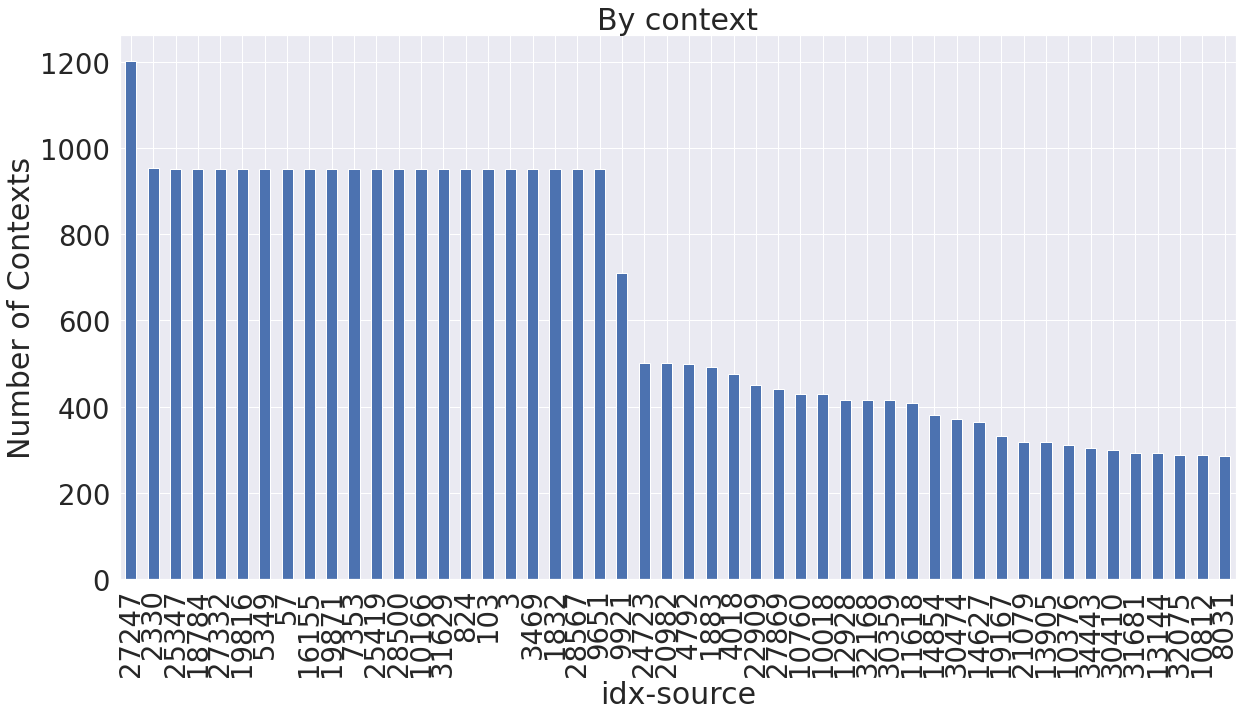

In [166]:
plt.title("By context")
plt.xlabel('Shader ID')
plt.ylabel('Number of Contexts')
df_source_count.sort_values('idx-context', ascending=False).head(50)['idx-context'].plot(kind='bar', figsize=(20, 10))

Text(0, 0.5, 'Shader ID')

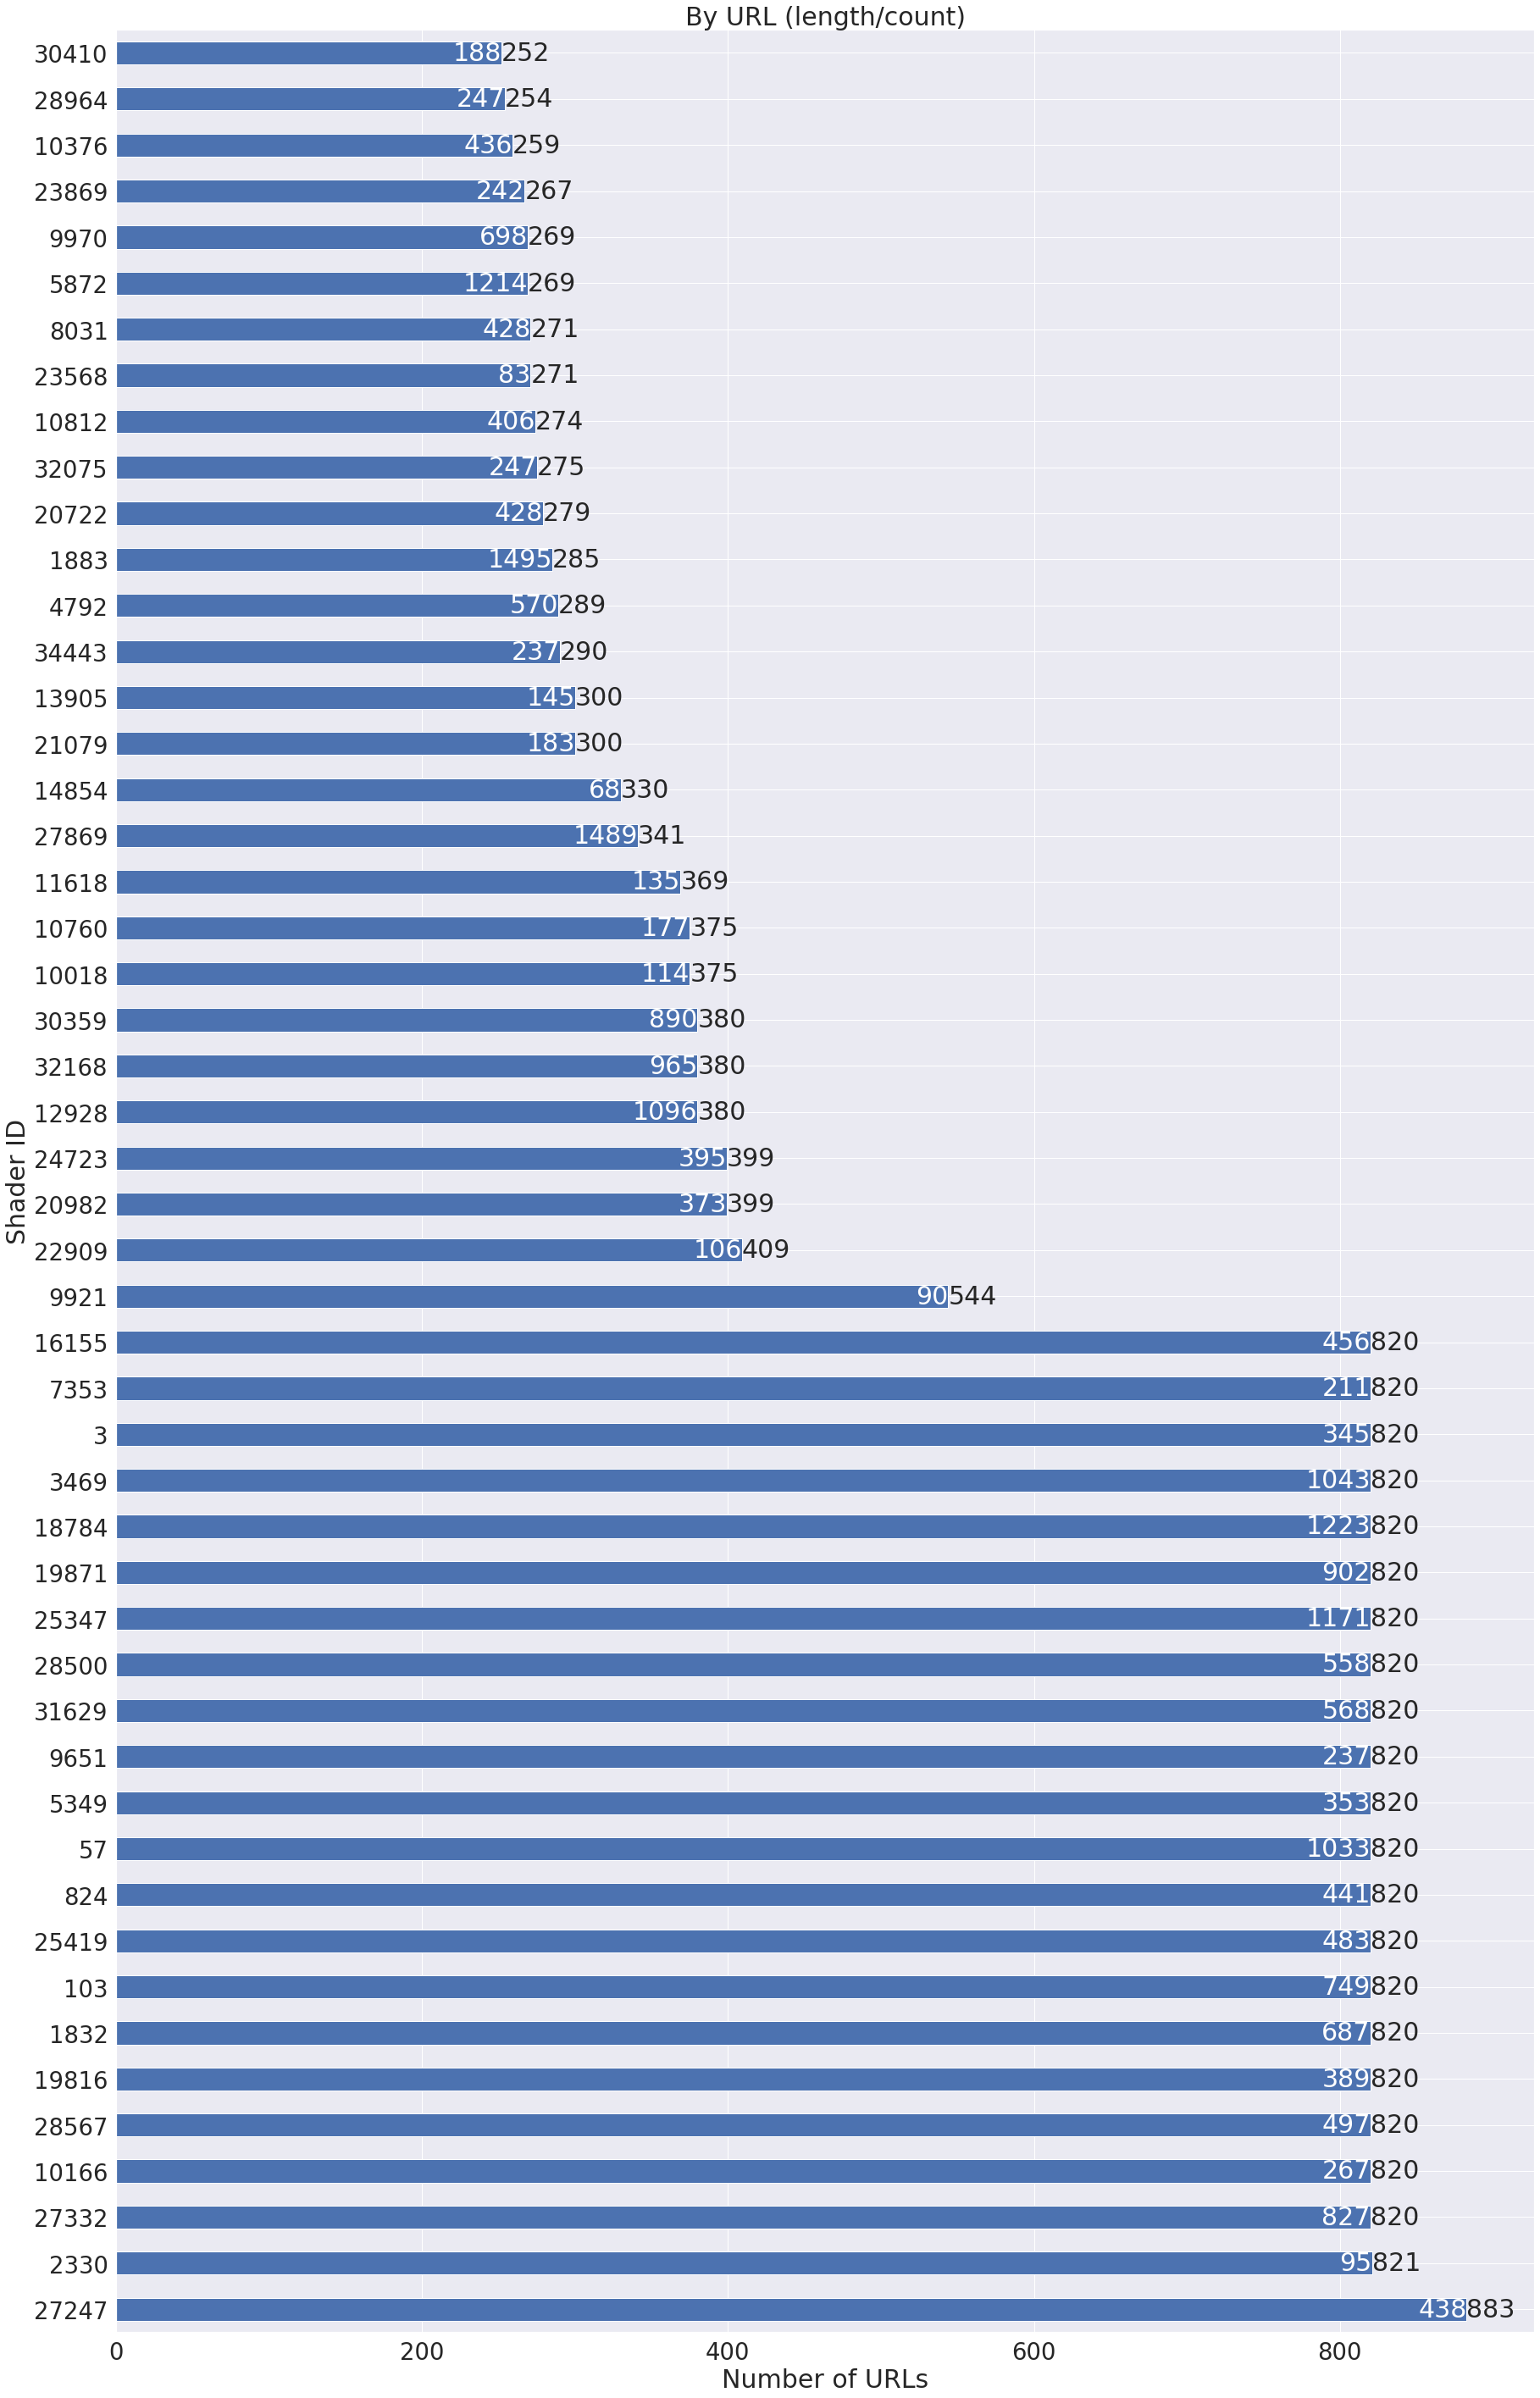

In [167]:
tmp = df_source_count.sort_values('url', ascending=False).head(50)
bar = tmp['url'].plot(kind='barh', figsize=(30, 50))
# bar = sns.barplot(x='url_count', y='index', hue='type', data=tmp, orient='h')
# label length on top of bar
for rect, url_count, length in zip(bar.patches,tmp['url'],tmp['frame.context.maghsk.shaders.length']):
    bar.annotate(f'{url_count}',
                    (rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    ha='left', va='center')
    bar.annotate(f'{length}',
                    (rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    ha='right', va='center', color='white')

# plt.figure(figsize=(30, 50))
plt.title("By URL (length/count)")
plt.xlabel('Number of URLs')
plt.ylabel('Shader ID')


### duplicity

Percentage of all unique shaders by Overall Duplicity: 22.40%
Percentage of all unique shaders by Across Sites Duplicity: 31.75%


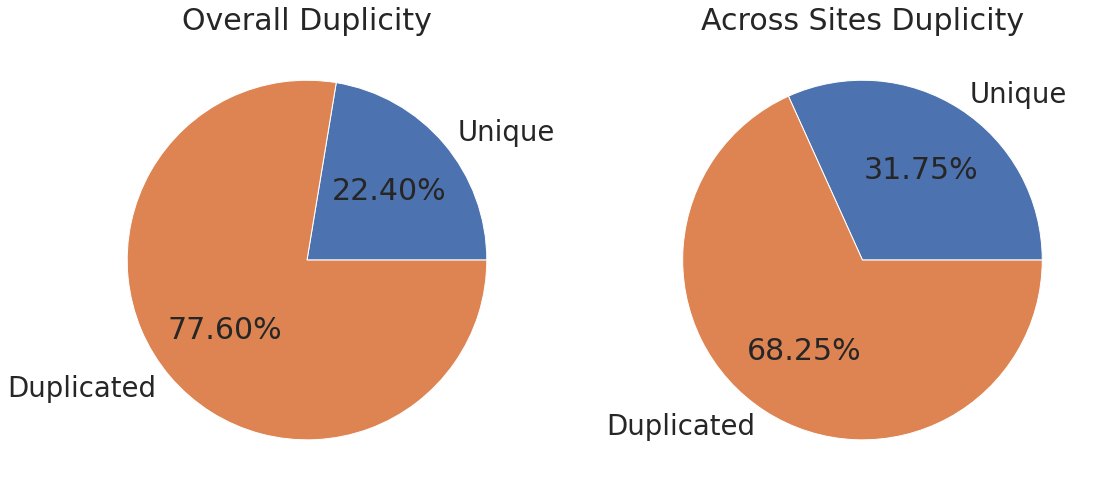

In [168]:
# create figure with four subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 12), )
sns.set(font_scale=2.5)
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']]
names = ['Overall Duplicity', 'Across Sites Duplicity']
for i in range(2):
    if subset[i] is None:
        df_shaders_trim_dedup = df_shaders_trim
    else:
        df_shaders_trim_dedup = df_shaders_trim.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    print("Percentage of all unique shaders by {}: {:.2f}%".format(names[i], ratio*100))
    axes[i].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i].set_title(names[i])
plt.tight_layout()
plt.savefig('fig/results_shader_duplicity.pdf', bbox_inches='tight')

Percentage of all unique translated shaders by Overall Duplicity: 22.39%
Percentage of all unique translated shaders by Across Sites Duplicity: 31.74%


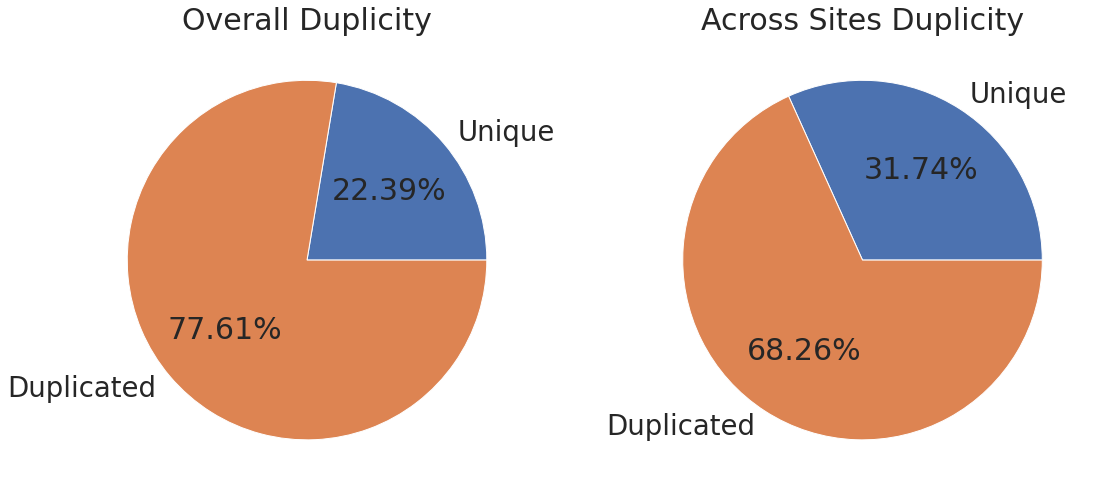

In [169]:
# create figure with four subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 12), )
sns.set(font_scale=2.5)
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.translatedSourceTrimedHashed', 'url']]
names = ['Overall Duplicity', 'Across Sites Duplicity']
for i in range(2):
    if subset[i] is None:
        df_shaders_trim_dedup = df_shaders_trim
    else:
        df_shaders_trim_dedup = df_shaders_trim.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.translatedSourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    print("Percentage of all unique translated shaders by {}: {:.2f}%".format(names[i], ratio*100))
    axes[i].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i].set_title(names[i])
plt.tight_layout()
plt.savefig('fig/results_translated_shader_duplicity.pdf', bbox_inches='tight')

Percentage of all unique shaders by shaders only: 25.47%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']: 33.40%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame']: 31.03%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']: 28.80%


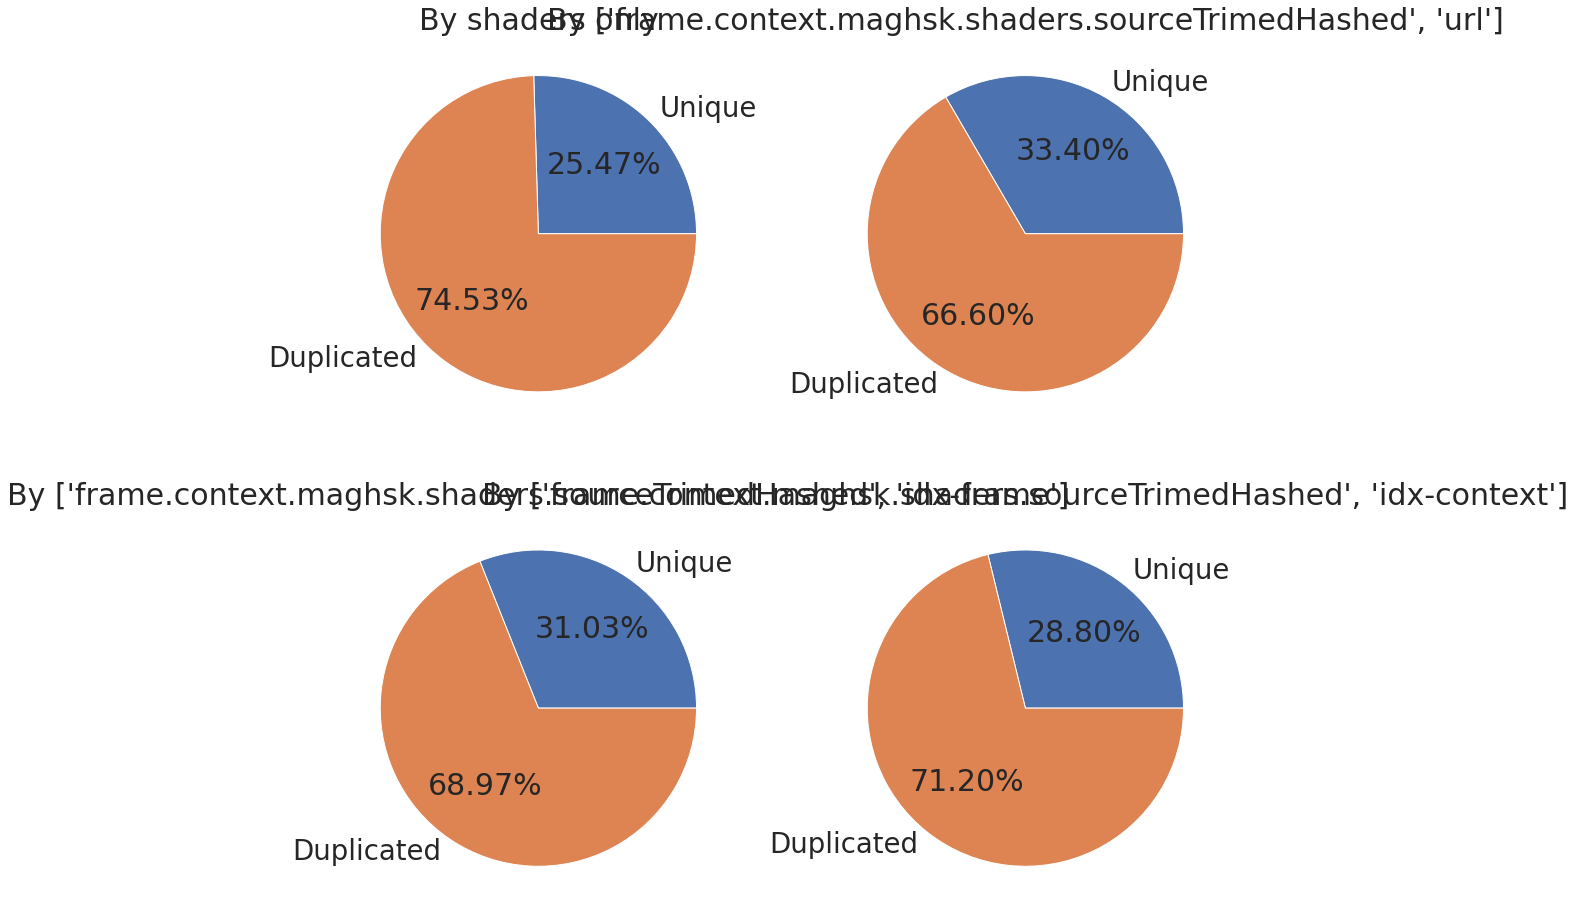

In [170]:
# create figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.type'] == 'frag']
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']]
for i in range(4):
    if subset[i] is None:
        df_shaders_trim_dedup = tmp
    else:
        df_shaders_trim_dedup = tmp.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    by_str = str(subset[i]) if subset[i] is not None else 'shaders only'
    print("Percentage of all unique shaders by {}: {:.2f}%".format(by_str, ratio*100))
    axes[i//2][i%2].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i//2][i%2].set_title('By {}'.format(by_str))
plt.show()

Percentage of all unique shaders by shaders only: 19.16%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']: 29.70%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame']: 28.03%
Percentage of all unique shaders by ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']: 25.70%


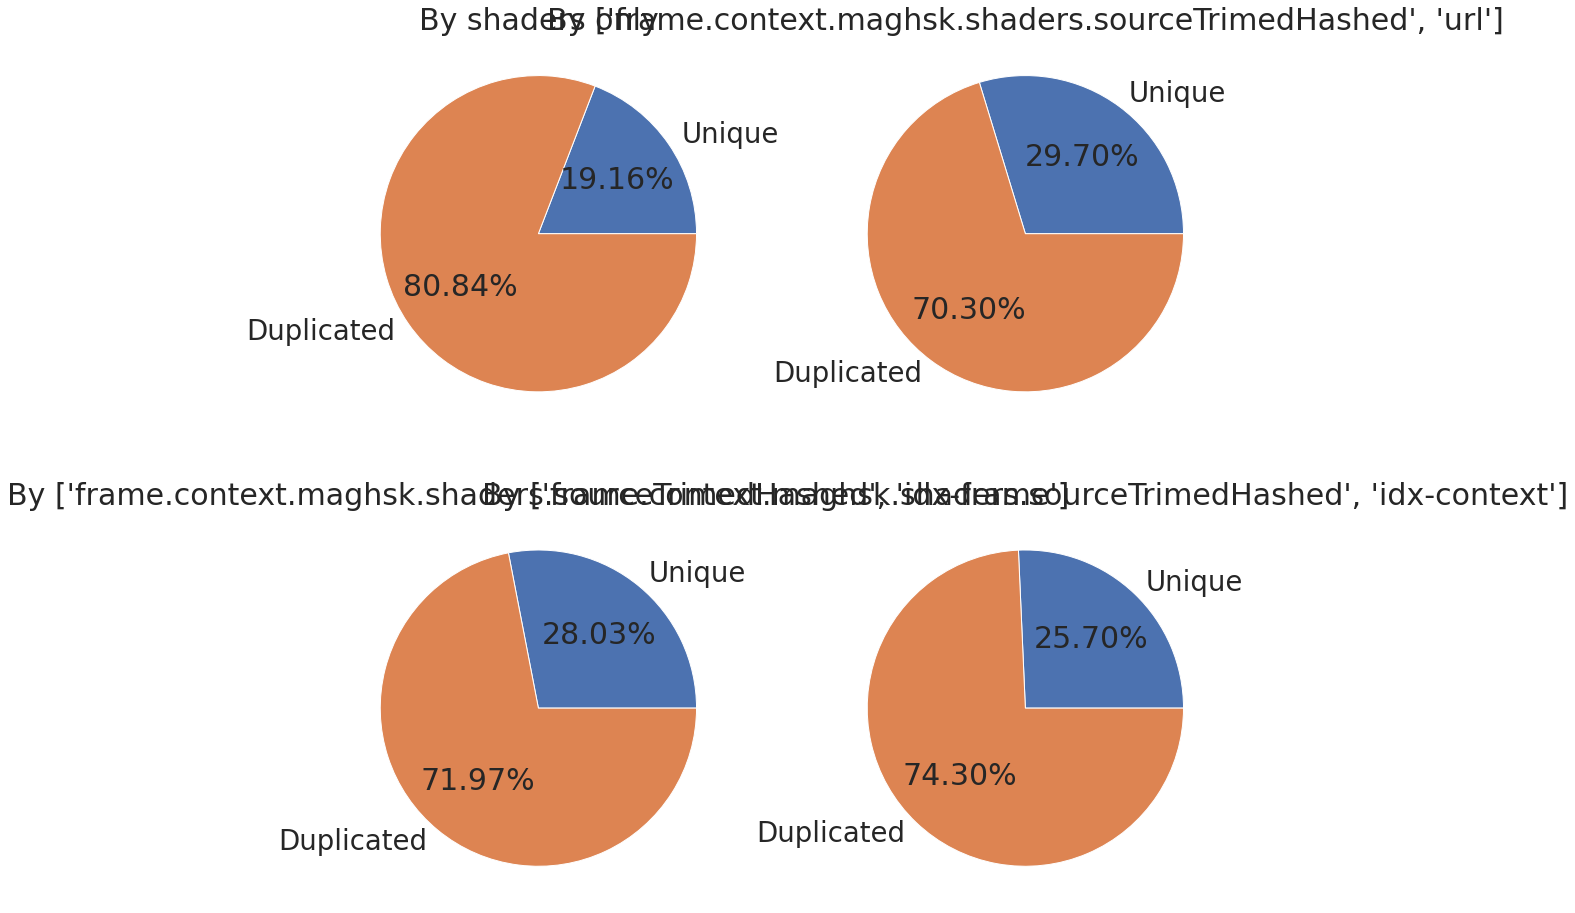

In [171]:
# create figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.type'] == 'vert']
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-frame'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'idx-context']]
for i in range(4):
    if subset[i] is None:
        df_shaders_trim_dedup = tmp
    else:
        df_shaders_trim_dedup = tmp.drop_duplicates(subset=subset[i], keep='first')
    # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
    ratio = 1.0 - df_shaders_trim_dedup.duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum() / len(df_shaders_trim_dedup)
    by_str = str(subset[i]) if subset[i] is not None else 'shaders only'
    print("Percentage of all unique shaders by {}: {:.2f}%".format(by_str, ratio*100))
    axes[i//2][i%2].pie([ratio, 1-ratio], labels=['Unique', 'Duplicated'], autopct='%.2f%%')
    axes[i//2][i%2].set_title('By {}'.format(by_str))
plt.show()

## translated compression ratio

In [172]:
tmp = df_shader['frame.context.maghsk.shaders.translatedSource'].str.len() / df_shader['frame.context.maghsk.shaders.source'].str.len()

In [173]:
df_shader.loc[0]['frame.context.maghsk.shaders.translatedSource']

'// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n#version 300 es\nprecision mediump sampler2DArray;\n#define attribute in\n#define varying out\n#define texture2D texture\nprecision highp float;\nprecision highp int;\n#define HIGH_PRECISION\n#define SHADER_NAME MeshStandardMaterial\n#define STANDARD \n#define USE_FOG\n#define FLAT_SHADED\nuniform mat4 modelMatrix;\nuniform mat4 modelViewMatrix;\nuniform mat4 projectionMatrix;\nuniform mat4 viewMatrix;\nuniform mat3 normalMatrix;\nuniform vec3 cameraPosition;\nuniform bool isOrthographic;\n#ifdef USE_INSTANCING\n\tattribute mat4 instanceMatrix;\n#endif\n#ifdef USE_INSTANCING_COLOR\n\tattribute vec3 instanceColor;\n#endif\nattribute vec3 position;\nattribute vec3 normal;\nattribute vec2 uv;\n#ifdef USE_UV1\n\tattribute vec2 uv1;\n#endif\n#ifdef USE_UV2\n\tattribute vec2 uv2;\n#endif\n#ifdef USE_UV3\n\tattribute vec2 uv3;\n#endif\n#ifdef USE_TANGENT\n\tattribute vec4 tangent;\n#endif\n#if defined( USE_COLOR_ALPHA )\n\tattribute vec4 color;\n#el

<AxesSubplot:>

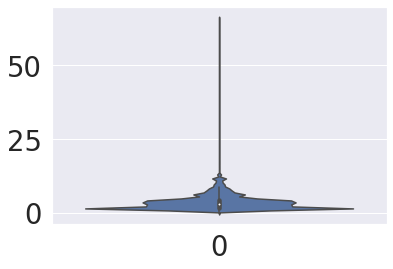

In [174]:
sns.violinplot(tmp)

### shader Count

In [175]:
# shader count in a page
df_shader['frame.context.maghsk.shaders.source']
tmp = df_shader.groupby('idx')['idx'].count()
tmp.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9195.000000
mean       16.285372
std        53.050004
min         1.000000
25%         3.000000
50%         8.000000
75%        20.000000
90%        32.000000
95%        46.000000
99%       115.000000
max      4256.000000
Name: idx, dtype: float64

In [176]:
tmp[tmp==4144]

Series([], Name: idx, dtype: int64)

In [177]:
df_shader[df_shader['idx']==29066]['frame.context.maghsk.shaders.source'].nunique()

107

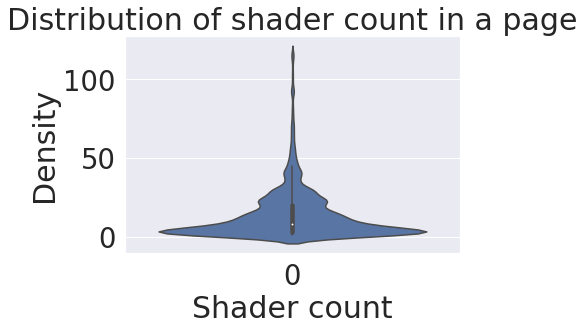

In [178]:
# plot the distribution of tmp
sns.violinplot(tmp[tmp <= 116])
plt.title('Distribution of shader count in a page')
plt.xlabel('Shader count')
plt.ylabel('Density')
plt.savefig('fig/results_shader_count.pdf', bbox_inches='tight')

count    9380.000000
mean       11.568870
std        13.562964
min         1.000000
50%         8.000000
75%        16.000000
90%        24.000000
95%        33.000000
99%        57.210000
max       346.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

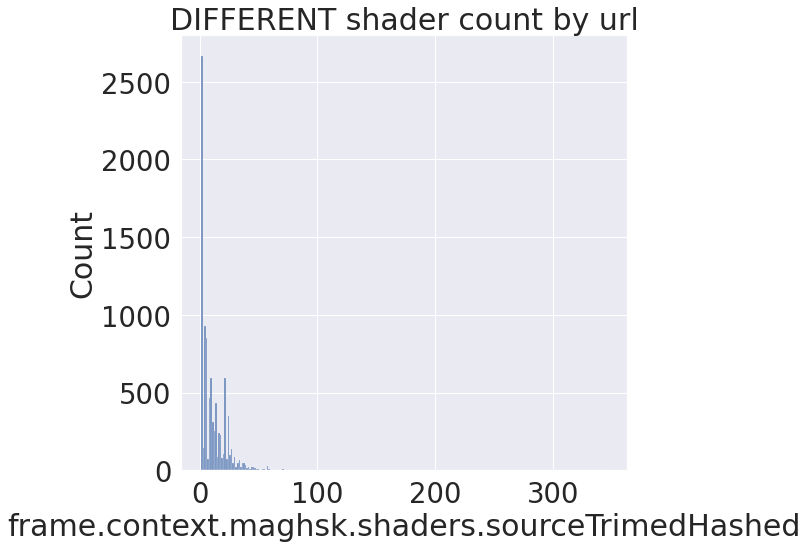

In [179]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].nunique()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.title('DIFFERENT shader count by url')
plt.plot()
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9380.000000
mean       16.400107
std        52.858264
min         1.000000
50%         8.000000
75%        20.000000
90%        32.000000
95%        46.000000
99%       115.210000
max      4256.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

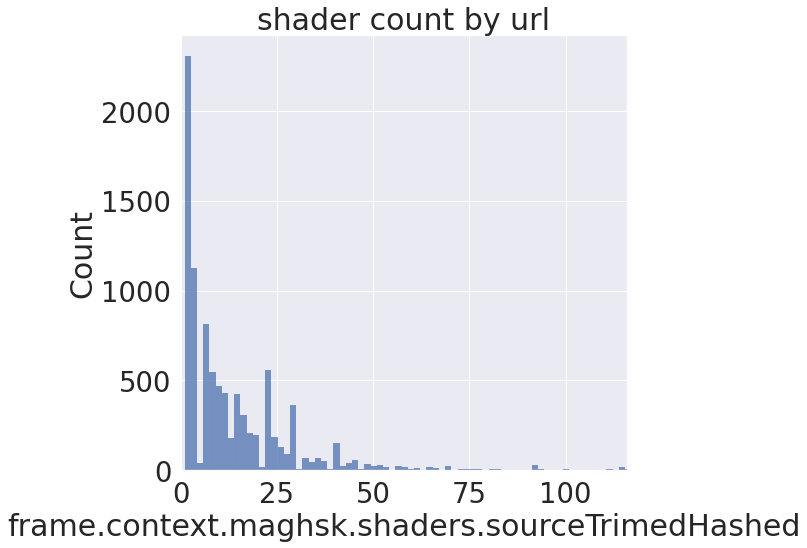

In [180]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].count()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.xlim((0, 116))
plt.title('shader count by url')
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

### shader length

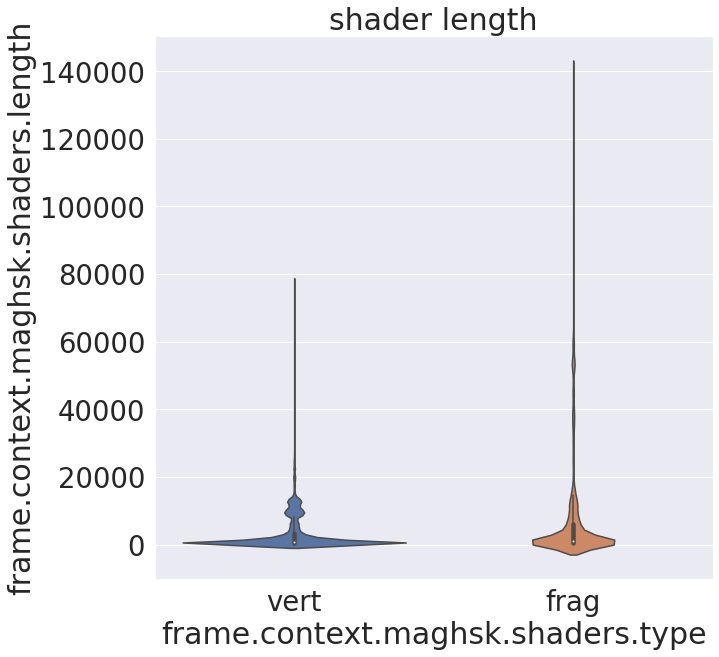

In [181]:
plt.figure(figsize=(10, 10))
# sns.histplot(data=df_shaders_trim_dedup, x="shader_length", hue="shader_type", multiple="layer", element="step")
# sns.violinplot(data=df_shaders_trim, x="shader_type", y="shader_length")
sns.violinplot(data=df_shaders_trim, x="frame.context.maghsk.shaders.type", y="frame.context.maghsk.shaders.length")
plt.title('shader length')
plt.show()

## extensions

In [182]:
print("Canvas count:", df_context_noraf.dropna(subset=['frame.context.maghsk.createArguments.0']).shape[0])

Canvas count: 34256


In [183]:
from collections import defaultdict

In [184]:
with open('input/webgl-extension-categories.json', 'r') as fp:
    category_to_extension = json.load(fp)

extension_to_category = defaultdict(lambda: 'unknown')
for category, extensions in category_to_extension.items():
    for extension in extensions:
        extension_to_category[extension] = category

In [185]:
tmp = df_context_noraf[['frame.context.maghsk.createArguments.0', 'frame.context.maghsk.extensions']].dropna()
tmp['frame.context.maghsk.extensions'] = tmp['frame.context.maghsk.extensions'].apply(lambda x: len(set(x)))
tmp.rename(columns={'frame.context.maghsk.createArguments.0': 'type', 'frame.context.maghsk.extensions': 'extension_count'}, inplace=True)
tmp['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)

In [186]:
tmp['extension_count'].value_counts()

extension_count
0     12592
1      7547
9      2603
2      2582
4      1682
8      1463
5       952
3       910
14      751
6       564
11      442
12      407
7       388
10      266
15      255
13      238
20      110
25       84
22       69
18       65
23       63
19       59
29       53
17       45
21       37
16       14
31        6
27        2
96        2
34        2
33        1
26        1
28        1
Name: count, dtype: int64

In [195]:
# count zero of extension_count
1 - (tmp['extension_count'].value_counts() / len(tmp))

extension_count
0     0.632415
1     0.779688
9     0.924013
2     0.924626
4     0.950899
8     0.957292
5     0.972209
3     0.973435
14    0.978077
6     0.983536
11    0.987097
12    0.988119
7     0.988674
10    0.992235
15    0.992556
13    0.993052
20    0.996789
25    0.997548
22    0.997986
18    0.998103
23    0.998161
19    0.998278
29    0.998453
17    0.998686
21    0.998920
16    0.999591
31    0.999825
27    0.999942
96    0.999942
34    0.999942
33    0.999971
26    0.999971
28    0.999971
Name: count, dtype: float64

(0.0, 40.0)

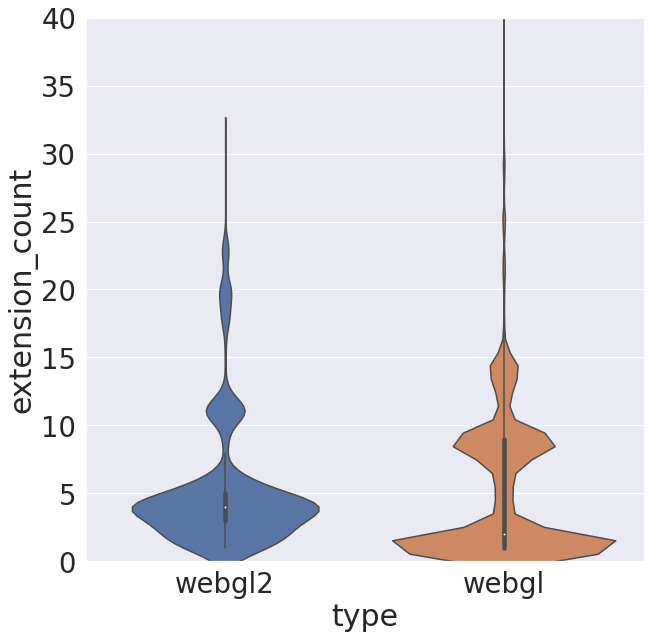

In [188]:
# show the distribution of extension_count of each context TYPE
plt.figure(figsize=(10, 10))
# sns.barplot(data=tmp, x="type", y="extension_count")
# sns.boxplot(data=tmp, x="type", y="extension_count")
sns.violinplot(data=tmp[tmp['extension_count'] > 0], x="type", y="extension_count")
plt.ylim(0, 40)

<AxesSubplot:xlabel='used extension', ylabel='type'>

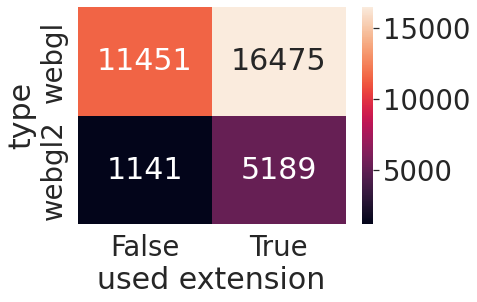

In [189]:
tmpa = tmp.copy()
tmpa['used extension'] = tmpa['extension_count'].apply(lambda x: x > 0)
sns.heatmap(tmpa.groupby(['type', 'used extension']).size().unstack(), annot=True, fmt='d')

In [190]:
df_ext = df_context_noraf[['frame.context.maghsk.extensions', 'frame.context.maghsk.createArguments.0']].dropna()
df_ext = df_ext.rename(columns={'frame.context.maghsk.extensions': 'extensions', 'frame.context.maghsk.createArguments.0': 'type'})
df_ext['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)
df_ext['extensions'] = df_ext['extensions'].apply(lambda x: list(set(x)))
df_ext

,extensions,type
0,"[EXT_color_buffer_half_float, OES_texture_floa...",webgl2
1,[WEBGL_lose_context],webgl
2,[],webgl2
3,"[OES_texture_float_linear, EXT_texture_filter_...",webgl2
4,"[OES_texture_float_linear, EXT_texture_filter_...",webgl2
...,...,...
35084,[],webgl
35085,[],webgl
35086,"[WEBGL_depth_texture, OES_texture_float, OES_t...",webgl
35087,"[OES_vertex_array_object, EXT_frag_depth, OES_...",webgl


In [191]:
df_ext_e = df_ext.explode('extensions').dropna().reset_index(drop=False).rename(columns={'index': 'idx-context'})
df_ext_e['extensions'] = df_ext_e['extensions'].str.lower()
set(df_ext_e['extensions'].tolist())

{'angle_instanced_arrays',
 'ext_blend_minmax',
 'ext_color_buffer_float',
 'ext_color_buffer_float_linear',
 'ext_color_buffer_half_float',
 'ext_disjoint_timer_query',
 'ext_disjoint_timer_query_webgl2',
 'ext_draw_buffers',
 'ext_float_blend',
 'ext_frag_depth',
 'ext_multisampled_render_to_texture',
 'ext_polygon_offset_clamp',
 'ext_shader_texture_lod',
 'ext_srgb',
 'ext_texture_compression_bptc',
 'ext_texture_compression_rgtc',
 'ext_texture_filter_anisotropic',
 'ext_texture_norm16',
 'gl_img_texture_compression_pvrtc',
 'gl_oes_standard_derivatives',
 'img_texture_compression_pvrtc',
 'khr_parallel_shader_compile',
 'moz_angle_instanced_arrays',
 'moz_ext_blend_minmax',
 'moz_ext_color_buffer_half_float',
 'moz_ext_disjoint_timer_query',
 'moz_ext_srgb',
 'moz_ext_texture_filter_anisotropic',
 'moz_oes_standard_derivatives',
 'moz_oes_texture_half_float',
 'moz_oes_texture_half_float_linear',
 'moz_oes_vertex_array_object',
 'moz_webgl_color_buffer_float',
 'moz_webgl_compres

### weird

In [192]:
df_weird = df_context_noraf.loc[df_context_noraf.index.isin(df_ext_e[df_ext_e['extensions'] == 'webgl_debug_renderer_info']['idx-context'])]

In [193]:
a = df_weird[[x for x in df_weird.columns if x.startswith('frame.context.maghsk.counter.funcCount')]].sum(axis=1)
print(len(a))

6118


In [194]:
print((a < 7).sum() / len(a))
print((a < 7).sum())

0.7544949329846355
4616


In [196]:
print(df_weird['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0      5071
2       428
16       92
92       59
14       58
       ... 
72        1
110       1
296       1
53        1
246       1
Name: count, Length: 61, dtype: int64


In [197]:
print(df_weird[a<7]['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0    4616
Name: count, dtype: int64


In [198]:
df_ext_e.groupby('extensions').nunique().to_csv('extensions_usage.csv')
print(df_ext_e['idx-context'].nunique())

21664


In [199]:
df_ext_e[df_ext_e['extensions']=='ovr_multiview2']['idx-context'].nunique() / df_ext_e['idx-context'].nunique()

0.013386262924667651

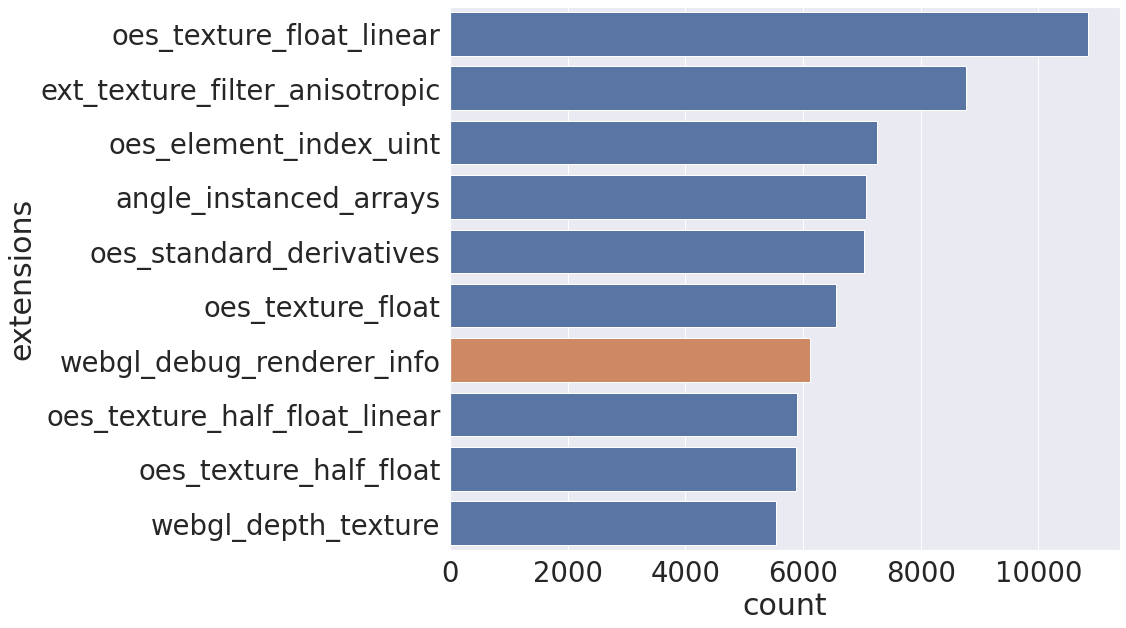

In [200]:
plt.figure(figsize=(12, 10))

# Get the top 20 values based on their counts
tmp = df_ext_e['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

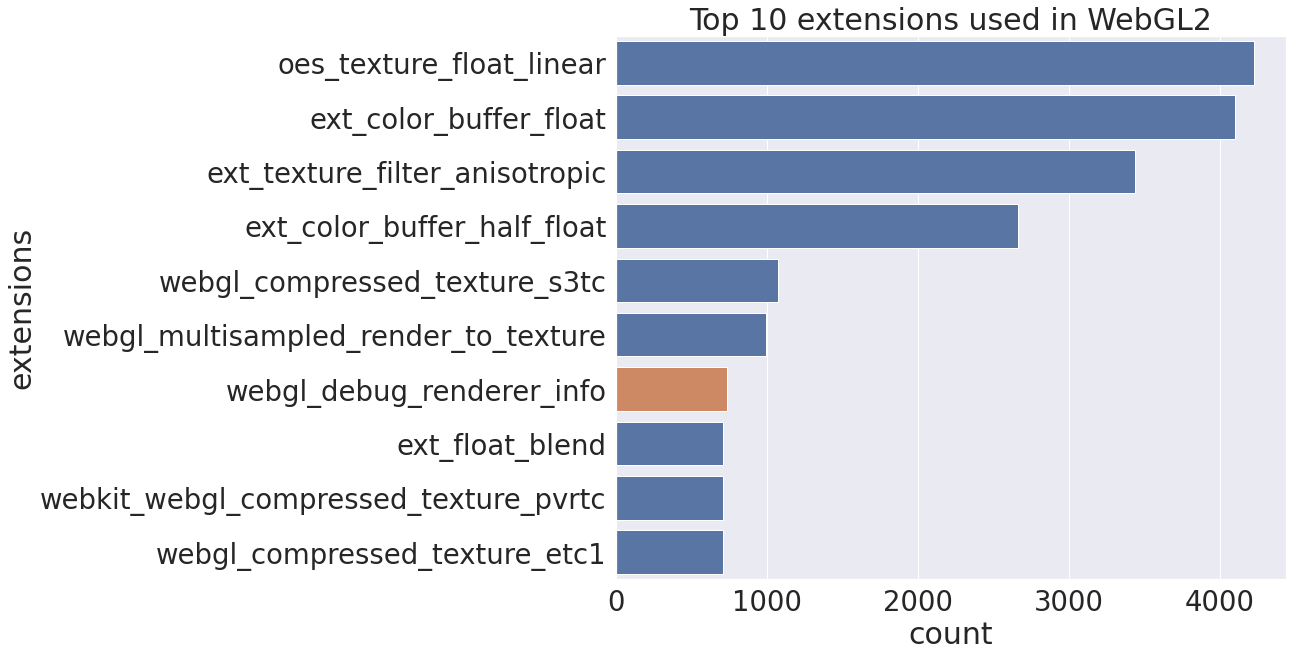

In [203]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl2']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.title('Top 10 extensions used in WebGL2')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

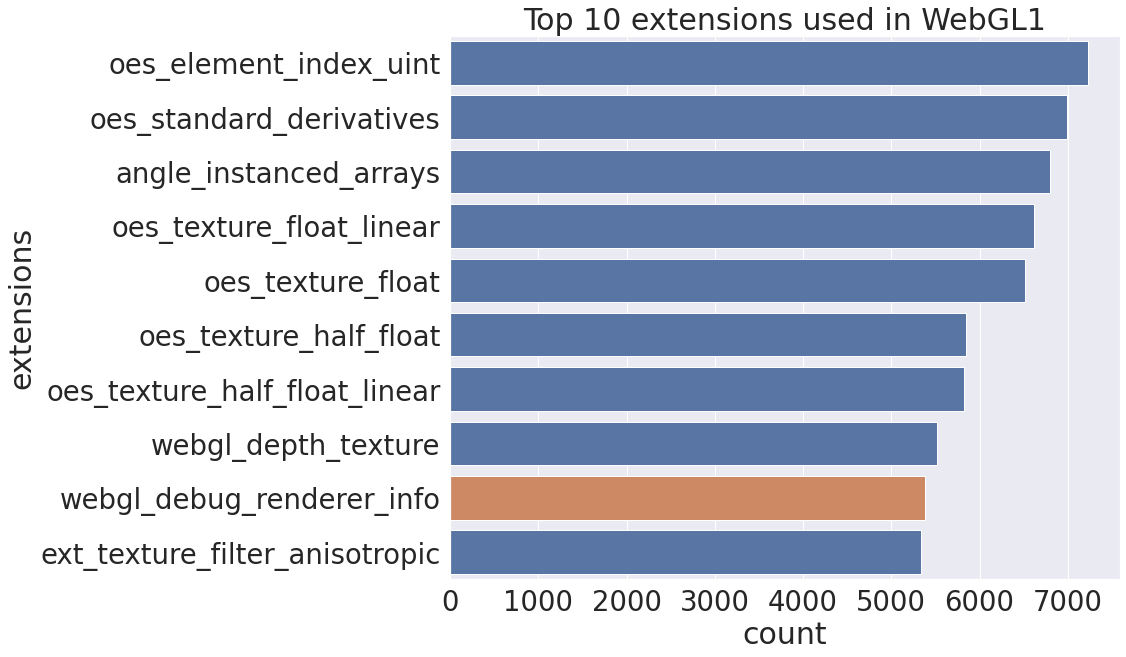

In [204]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*8+[color_palette[1]]+[color_palette[0]]*1)
plt.title('Top 10 extensions used in WebGL1')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

## Context Attributes & Create Arguments

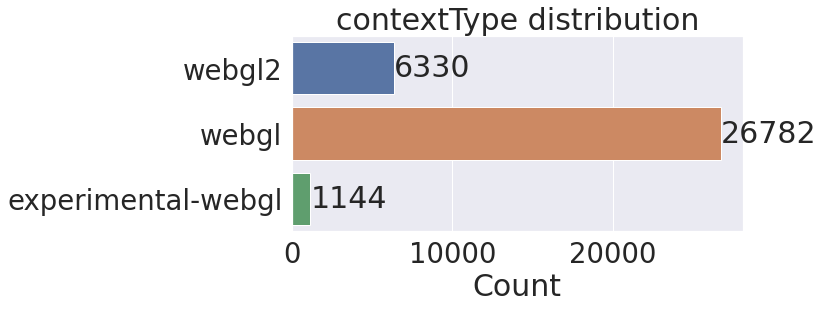

In [210]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes)
axes.set_xlabel('Count')
axes.set_ylabel('')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()
plt.savefig('fig/results_raf_contextType.pdf', bbox_inches='tight')

In [205]:
df_context_noraf.columns.tolist()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
 'frame.context.maghsk.cou

In [206]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.anialias'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
1291,3967,1283,['bq'],0,1,1,,http://mapping.tools/,1683356978193,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaviet'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
1953,6133,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference'].fillna('not set').value_counts()

frame.context.maghsk.createArguments.1.powerPreference
not set             27042
default              4246
high-performance     2948
low-power              41
Name: count, dtype: int64

In [209]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference']=='low-power']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
1046,3336,1083,[awwwards],0,1,0,,http://juicebrothers.at,1683356870295,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,6133,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3863,13128,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,13128,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,17295,4982,['bq'],0,1,1,,https://apiida.com/,1683364443696,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12174,38396,10316,[awwwards],0,1,0,scroll,https://hytek.co.jp/,1683374316792,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17779,55297,14138,[awwwards],0,1,0,,https://peaceprizelaureates.nobelpeacecenter.o...,1683381581287,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18750,57761,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18751,57761,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18752,57761,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
create_arguments_columns_list = [ 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.desynchronized',
 'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.xrCompatible', ]

In [227]:
tmp = df_context_noraf[create_arguments_columns_list].fillna('not set').rename(columns={
    'frame.context.maghsk.createArguments.1.alpha': 'alpha',
    'frame.context.maghsk.createArguments.1.antialias': 'antialias',
    'frame.context.maghsk.createArguments.1.depth': 'depth',
    'frame.context.maghsk.createArguments.1.desynchronized': 'desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat': 'failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference': 'powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha': 'premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer': 'preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil': 'stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible': 'xrCompatible',
})

tmp

,alpha,antialias,depth,desynchronized,failIfMajorPerformanceCaveat,powerPreference,premultipliedAlpha,preserveDrawingBuffer,stencil,xrCompatible
0,True,False,True,not set,False,default,True,False,True,not set
1,not set,not set,not set,not set,True,not set,not set,not set,True,not set
2,not set,not set,not set,not set,not set,not set,not set,not set,not set,not set
3,True,True,not set,not set,not set,not set,True,False,True,not set
4,True,True,not set,not set,not set,not set,True,False,True,not set
...,...,...,...,...,...,...,...,...,...,...
35084,False,not set,True,not set,not set,high-performance,not set,not set,True,not set
35085,not set,not set,not set,not set,not set,not set,not set,not set,not set,not set
35086,True,True,True,not set,not set,not set,True,False,True,not set
35087,True,False,True,not set,False,not set,not set,False,True,not set


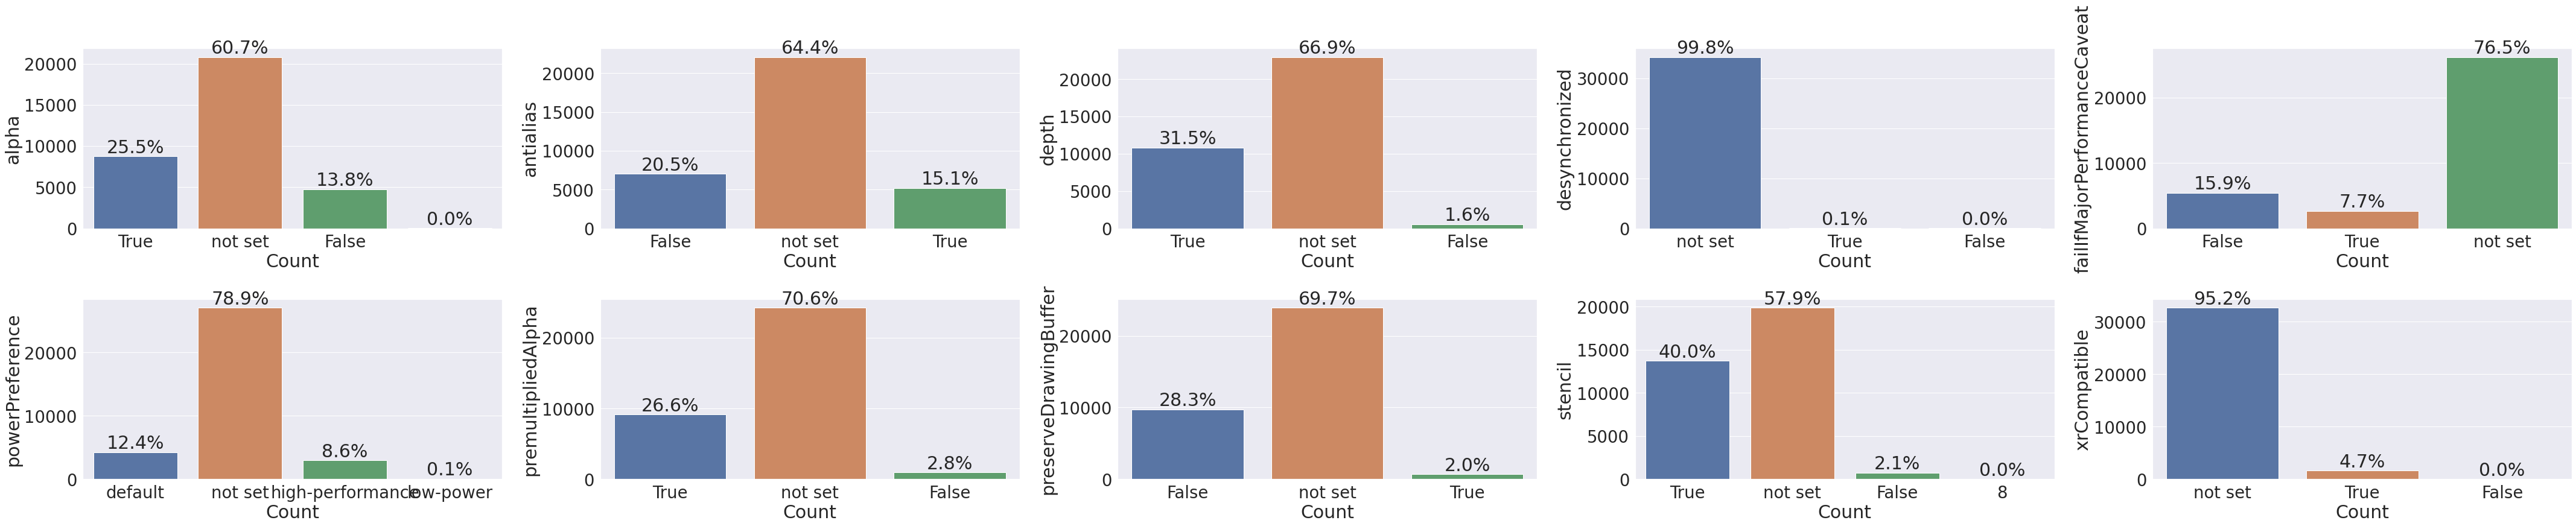

In [228]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(60, 12))
for i, col in enumerate(tmp.columns):
    sns.countplot(x=col, data=tmp, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_xlabel('Count')
    axes[i//5, i%5].set_ylabel(col)
    for rect in axes[i//5, i%5].patches:
        axes[i//5, i%5].annotate(f'{rect.get_height()/len(tmp)*100:.1f}%', 
                            (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                            ha='center', va='bottom')
plt.tight_layout()


In [246]:
results = [tmp[col].value_counts() for col in tmp.columns]
results = pd.concat(results, axis=1).drop(8).drop('')
results.columns = tmp.columns
results.T

,not set,True,False,default,high-performance,low-power
alpha,20797.0,8734.0,4745.0,NaN,NaN,NaN
antialias,22077.0,5182.0,7018.0,NaN,NaN,NaN
depth,22942.0,10793.0,542.0,NaN,NaN,NaN
desynchronized,34222.0,43.0,12.0,NaN,NaN,NaN
failIfMajorPerformanceCaveat,26208.0,2636.0,5433.0,NaN,NaN,NaN
powerPreference,27042.0,NaN,NaN,4246.0,2948.0,41.0
premultipliedAlpha,24210.0,9114.0,953.0,NaN,NaN,NaN
preserveDrawingBuffer,23884.0,688.0,9705.0,NaN,NaN,NaN
stencil,19836.0,13704.0,736.0,NaN,NaN,NaN
xrCompatible,32647.0,1617.0,13.0,NaN,NaN,NaN


# TODO:
-------

In [ ]:
df_traces_status = pd.DataFrame(list(df_traces['status']), index=df_traces.index, dtype='string')
df_traces_status = df_traces_status.add_prefix('status-')
df_traces.drop(columns=['status'], inplace=True)
df_traces = df_traces.merge(df_traces_status, left_index=True, right_index=True)

In [ ]:
tmp = df_traces['gl_info_raf'].dropna(inplace=False)
df_url = pd.DataFrame(tmp.to_list(), index=tmp.index).drop(columns=['url'])
df_url = df_traces.merge(df_url, how='left', left_index=True, right_index=True)
df_url.reset_index(inplace=True)

In [ ]:
df_url.rename(columns={
    'filename': 'instrument-filename',
    'url': 'instrument-url',
    'start_time': 'instrument-start_time',
    'duration': 'instrument-duration',
    'har': 'instrument-har',
    'accessTime': 'url-accessTime',
    'rafFuncCountList': 'url-rafFuncCountList',
    'title': 'url-title',
    'usedOffScreenCanvas': 'url-usedOffScreenCanvas',
    'when': 'url-when',
    'whenDomContentLoadedEvent': 'url-whenDomContentLoadedEvent',
    'whenLoadEvent': 'url-whenLoadEvent',
    'whenUsedWebgl': 'url-whenUsedWebgl',
}, inplace=True)

In [ ]:
df_url[df_url['instrument-url'] == 'http://frontside.com.au']

In [ ]:
df_exploded = df_url.explode('contextInfo').dropna(subset=['contextInfo'])
df_context = pd.DataFrame(list(df_exploded['contextInfo']), index=df_exploded.index).drop(columns=['triangleCount']).add_prefix('context-')
df_url.drop(columns=['contextInfo'], inplace=True)
df_context = df_url.drop(columns=['gl_info_raf']).merge(df_context, how='left', left_index=True, right_index=True)
df_context.reset_index(inplace=True, drop=True)
df_context.index.name = 'context-id'

In [ ]:
tmp = df_context['context-maghsk'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-')
tmp = df_context['context-memoryInfo'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-')
tmp = df_context['context-contextAttributes'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-attributes-')

df_context = df_context.drop(columns=['context-maghsk']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-memoryInfo']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-contextAttributes']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
df_context = df_context.astype({
    'instrument-filename' : 'string',
    'instrument-url' : 'string',
    'instrument-start_time' : 'Float64',
    'instrument-duration' : 'Float64',
    'instrument-har' : 'object',
    'url-accessTime' : 'Float64',
    'url-rafFuncCountList' : 'object',
    'url-title' : 'string',
    'url-usedOffScreenCanvas' : 'boolean',
    'url-when' : 'Float64',
    'url-whenDomContentLoadedEvent' : 'Float64',
    'url-whenLoadEvent' : 'Float64',
    'url-whenUsedWebgl' : 'Float64',
    'context-canvasContained' : 'boolean',
    'context-canvasHidden' : 'boolean',
    'context-canvasSize' : 'object',
    'context-capturedFunctionsLength' : 'Float64',
    'context-extensions' : 'object',
    'context-programInfo' : 'object',
    'context-vertexCount' : 'Float64',
    'context-maghsk-counter' : 'object',
    'context-maghsk-createArguments' : 'object',
    'context-maghsk-createTime' : 'Float64',
    'context-maghsk-rafList' : 'object',
    'context-maghsk-pixelsRead' : 'Float64',
    'context-mem-memory' : 'object',
    'context-mem-resources' : 'object',
    'context-attributes-alpha' : 'boolean',
    'context-attributes-antialias' : 'boolean',
    'context-attributes-depth' : 'boolean',
    'context-attributes-desynchronized' : 'boolean',
    'context-attributes-failIfMajorPerformanceCaveat' : 'boolean',
    'context-attributes-powerPreference' : 'string',
    'context-attributes-premultipliedAlpha' : 'boolean',
    'context-attributes-preserveDrawingBuffer' : 'boolean',
    'context-attributes-stencil' : 'boolean',
    'context-attributes-xrCompatible' : 'boolean',
})

In [ ]:
tmp = df_context['context-maghsk-counter'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-')
tmp = df_context['context-mem-memory'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-memory-')
tmp = df_context['context-mem-resources'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-resources-')

df_context = df_context.drop(columns=['context-maghsk-counter']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-memory']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-resources']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
# context-maghsk-counter-funcCount	context-maghsk-counter-semanticVertexCalled	context-maghsk-counter-semanticVertexCount

tmp = df_context['context-maghsk-counter-semanticVertexCalled'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_call-')
tmp = df_context['context-maghsk-counter-semanticVertexCount'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_count-')
tmp = df_context['context-maghsk-counter-funcCount'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-funcCount-')

df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCalled']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCount']).merge(df_ctxattr, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-funcCount']).merge(df_maghsk, how='left', left_index=True, right_index=True)

In [ ]:
df_exploded = df_context.explode('context-programInfo').explode('context-programInfo').dropna(subset=['context-programInfo'])
df_program = pd.DataFrame(df_exploded['context-programInfo'].to_list(), index=df_exploded.index).add_prefix('context-program-')
df_context.drop(columns=['context-programInfo'], inplace=True)
df_program = df_context.merge(df_program, how='left', left_index=True, right_index=True)
df_program.reset_index(inplace=True, drop=False)
df_program.rename(columns={'index':'context-program-context_id'}, inplace=True)

In [ ]:
df_program.index.name = 'context-program-id'

In [ ]:
df_raf = df_context.dropna(subset=['context-maghsk-rafList'])[['instrument-filename', 'instrument-url', 'context-maghsk-rafList']]
df_raf

In [ ]:
df_tmp = df_raf.explode('context-maghsk-rafList').dropna(subset=['context-maghsk-rafList'])
df_raflist = pd.DataFrame(df_tmp['context-maghsk-rafList'].to_list(), index=df_tmp.index).add_prefix('rafList-')
df_raflist = df_raf.merge(df_raflist, how='left', left_index=True, right_index=True).drop(columns=['context-maghsk-rafList'])
df_raflist

In [ ]:
df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()]

In [ ]:
assert df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()].shape[0] == 0

In [ ]:
df_a = pd.DataFrame(df_raflist['rafList-semanticVertexCalled'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCalled-')
df_b = pd.DataFrame(df_raflist['rafList-semanticVertexCount'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCount-')
df_c = pd.DataFrame(df_raflist['rafList-funcCount'].to_list(), index=df_raflist.index).add_prefix('rafList-funcCount-')

In [ ]:
# concat df_a, df_b, df_c
df_raflist_abc = pd.concat([df_raflist, df_a, df_b, df_c], axis=1)
df_raflist_abc.drop(columns=['rafList-funcCount', 'rafList-semanticVertexCalled', 'rafList-semanticVertexCount'], inplace=True)
df_raflist_abc

In [ ]:
rename_dict = {}
for i in range(7):
    rename_dict[f'rafList-semanticVertexCalled-{i}'] = f'rafList-semanticVertexCalled-{gl_types[i]}'
    rename_dict[f'rafList-semanticVertexCount-{i}'] = f'rafList-semanticVertexCount-{gl_types[i]}'
df_raflist_abc.rename(columns=rename_dict, inplace=True)
df_raflist_abc

In [ ]:
# df_raflist_abc group by context-id and shift and minus
df_tmp = df_raflist_abc.drop(columns=['instrument-filename', 'instrument-url', 'rafList-when'])
df_tmp = df_tmp.groupby('context-id').shift(0) - df_tmp.groupby('context-id').shift(1)
# df_tmp.dropna(subset=['rafList-bufferDataSent'], inplace=True)
df_tmp_groupby = df_tmp.groupby('context-id')

In [ ]:
df_raf_stat = df_tmp_groupby.agg(['mean', 'std', 'count'])

In [ ]:
df_raf_stat_subset = df_raf_stat[['rafList-semanticVertexCalled-POINTS', 'rafList-semanticVertexCalled-LINES', 'rafList-semanticVertexCalled-LINE_LOOP', 'rafList-semanticVertexCalled-LINE_STRIP', 'rafList-semanticVertexCalled-TRIANGLES', 'rafList-semanticVertexCalled-TRIANGLE_STRIP', 'rafList-semanticVertexCalled-TRIANGLE_FAN', 'rafList-semanticVertexCount-POINTS', 'rafList-semanticVertexCount-LINES', 'rafList-semanticVertexCount-LINE_LOOP', 'rafList-semanticVertexCount-LINE_STRIP', 'rafList-semanticVertexCount-TRIANGLES', 'rafList-semanticVertexCount-TRIANGLE_STRIP', 'rafList-semanticVertexCount-TRIANGLE_FAN']]
df_raf_stat_subset

# Save to disk

In [ ]:
pickle_output_path = Path('output/pickle')
excel_output_path = Path('output/excel')

In [ ]:
pickle_output_path.mkdir(parents=True, exist_ok=True)
excel_output_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# save to pickle first
df_url.to_pickle(pickle_output_path / '0417-raf_url.pkl.zstd', compression='zstd')
df_context.to_pickle(pickle_output_path / '0417-raf_context.pkl.zstd', compression='zstd')
df_program.to_pickle(pickle_output_path / '0417-raf_program.pkl.zstd', compression='zstd')
df_raflist_abc.to_pickle(pickle_output_path / '0417-raf_raflist_abc.pkl.zstd', compression='zstd')
df_raf_stat.to_pickle(pickle_output_path / '0417-raf_stat.pkl.zstd', compression='zstd')

In [ ]:
# df_url.to_excel(excel_output_path / '0417-raf_url.xlsx', index=True)
# df_context.to_excel(excel_output_path / '0417-raf_context.xlsx', index=True)
# df_raf_stat_subset.to_excel(excel_output_path / '0417-raf_stat_subset.xlsx', index=True)